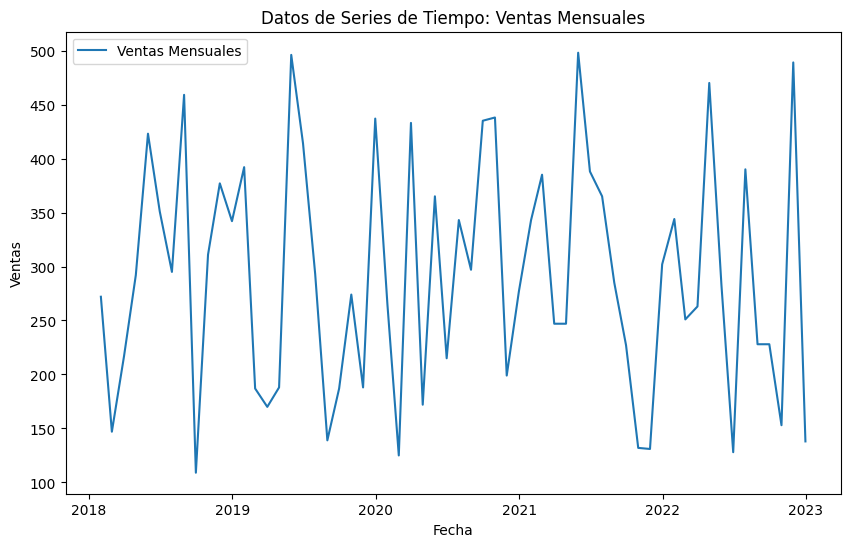

ADF Statistic: -7.929121375083372
p-value: 3.5521636566935744e-12


C:\Users\plopezme\AppData\Roaming\Python\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


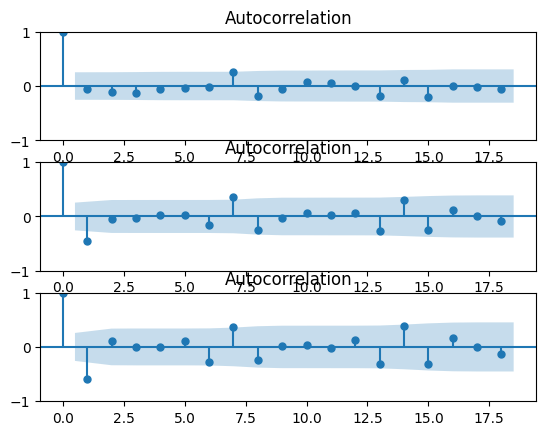

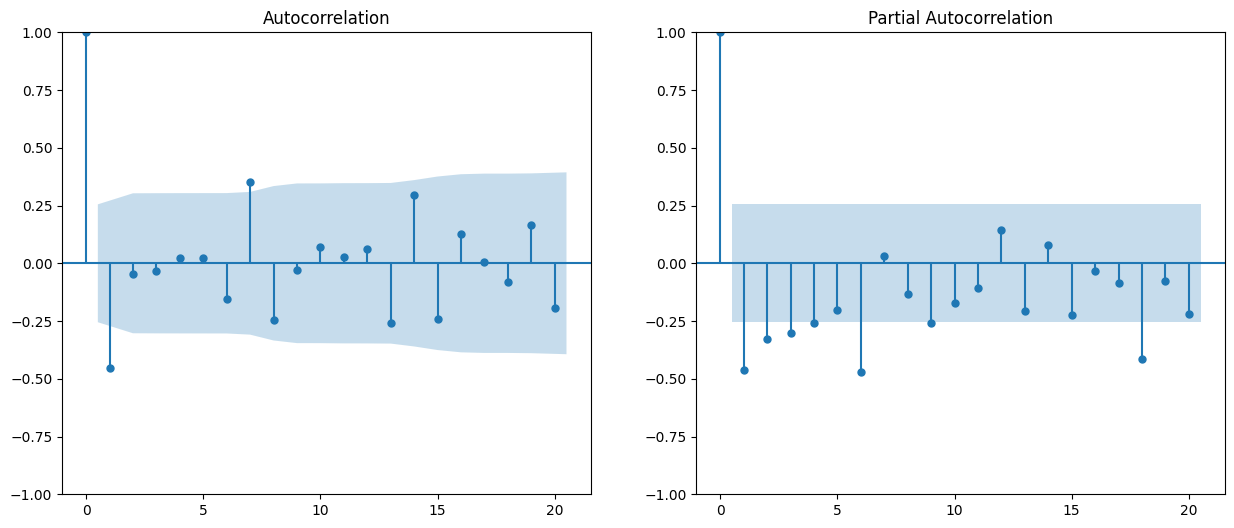

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Cargar datos de ejemplo
data = pd.read_csv('ventas_mensuales.csv', parse_dates=['fecha'], index_col='fecha')
series = data['ventas']

# Plotear la serie de tiempo original
plt.figure(figsize=(10, 6))
plt.plot(series, label='Ventas Mensuales')
plt.title('Datos de Series de Tiempo: Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Verificar estacionariedad utilizando la prueba de Dickey-Fuller aumentada
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Si la serie no es estacionaria, diferenciar los datos
differenced_series = series.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf 
fig, (ax1, ax2, ax3) = plt.subplots(3) 
plot_acf(series, ax=ax1) 
plot_acf(series.diff().dropna(), ax=ax2) 
plot_acf(series.diff().diff().dropna(), ax=ax3)

# Identificación de los parámetros p y q utilizando ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sm.graphics.tsa.plot_acf(differenced_series, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(differenced_series, lags=20, ax=axes[1])
plt.show()




C:\Users\plopezme\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\plopezme\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\plopezme\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\plopezme\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                 ventas   No. Observations:                   60
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -358.821
Date:                Wed, 10 Jul 2024   AIC                            737.641
Time:                        20:16:56   BIC                            758.416
Sample:                    01-31-2018   HQIC                           745.751
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4297      0.440     -0.976      0.329      -1.293       0.433
ar.L2         -0.1616      0.210     -0.770      0.442      -0.573       0.250
ar.L3         -0.1484      0.217     -0.684      0.4

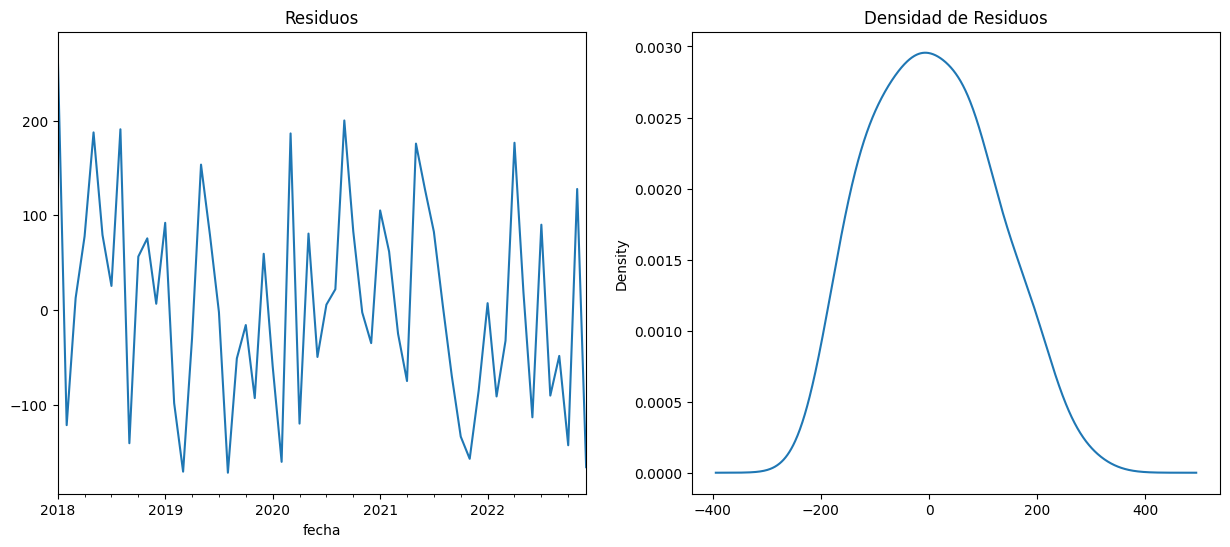

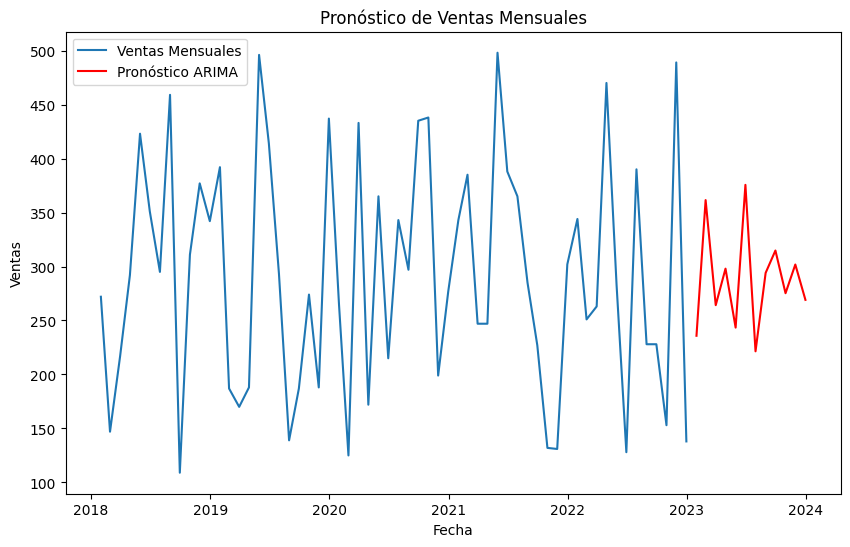

In [8]:

# Construcción del modelo ARIMA
model = ARIMA(series, order=(7, 1, 2))  # Ajustar p, d, q según los gráficos ACF y PACF
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Diagnóstico de residuos
residuals = model_fit.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuos", ax=axes[0])
residuals.plot(kind='kde', title='Densidad de Residuos', ax=axes[1])
plt.show()

# Pronóstico
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(series, label='Ventas Mensuales')
plt.plot(forecast, label='Pronóstico ARIMA', color='red')
plt.title('Pronóstico de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

Importing plotly failed. Interactive plots will not work.


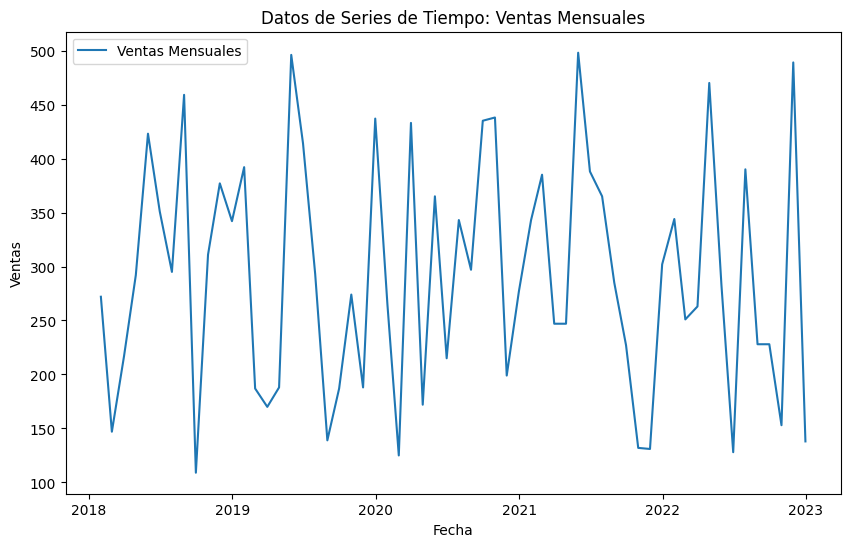

20:22:29 - cmdstanpy - INFO - Chain [1] start processing
20:22:30 - cmdstanpy - INFO - Chain [1] done processing


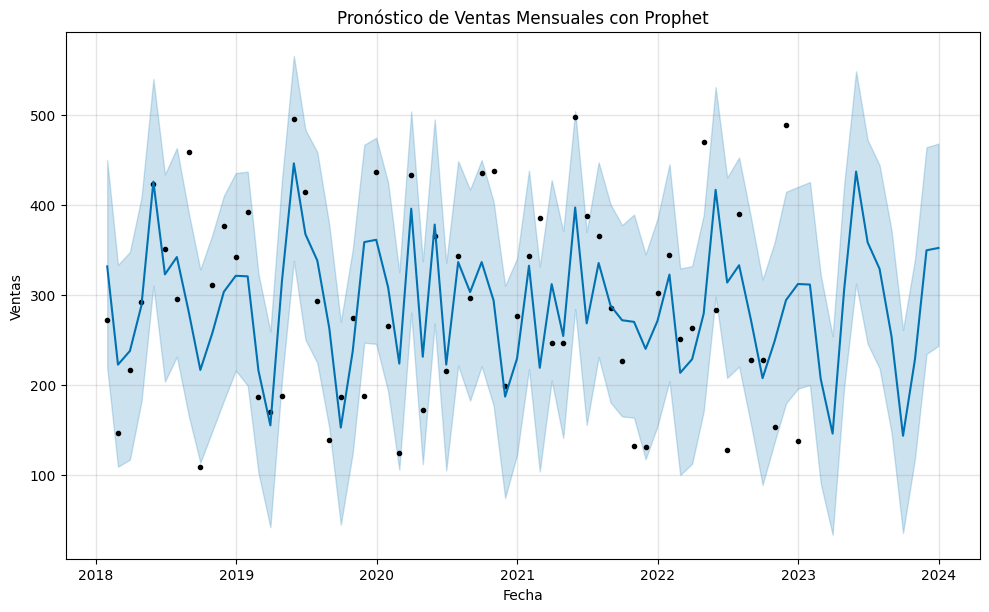

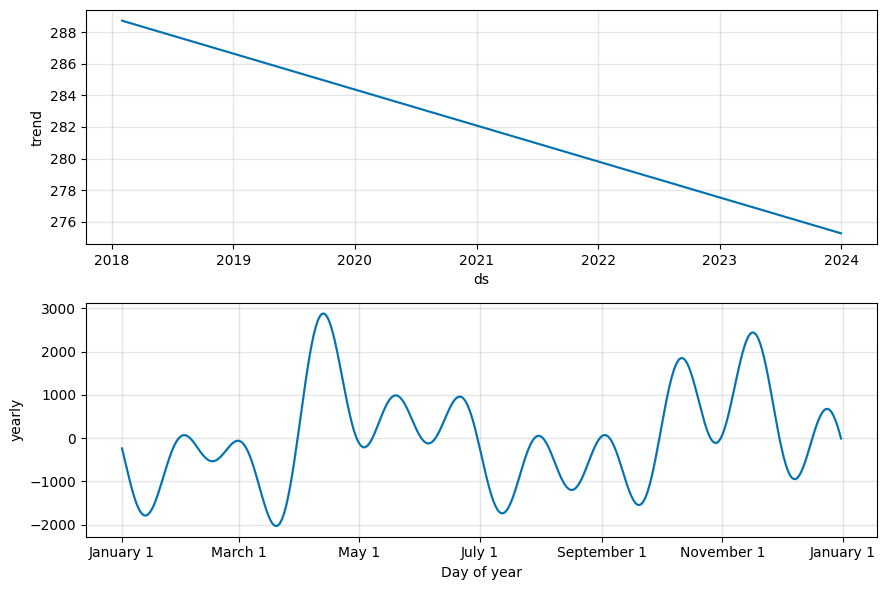

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Cargar datos de ejemplo
data = pd.read_csv('ventas_mensuales.csv', parse_dates=['fecha'], index_col='fecha')
data = data.reset_index()
data.columns = ['ds', 'y']

# Visualizar datos
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Ventas Mensuales')
plt.title('Datos de Series de Tiempo: Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Construir el modelo Prophet
model = Prophet()
model.fit(data)

# Realizar pronósticos
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Visualizar pronósticos
fig = model.plot(forecast)
plt.title('Pronóstico de Ventas Mensuales con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

# Visualizar componentes del modelo
fig2 = model.plot_components(forecast)
plt.show()


C:\Users\plopezme\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/20
46/46 - 9s - loss: 0.2232 - 9s/epoch - 189ms/step
Epoch 2/20
46/46 - 0s - loss: 0.0925 - 246ms/epoch - 5ms/step
Epoch 3/20
46/46 - 0s - loss: 0.0847 - 310ms/epoch - 7ms/step
Epoch 4/20
46/46 - 0s - loss: 0.0846 - 448ms/epoch - 10ms/step
Epoch 5/20
46/46 - 0s - loss: 0.0830 - 444ms/epoch - 10ms/step
Epoch 6/20
46/46 - 0s - loss: 0.0840 - 450ms/epoch - 10ms/step
Epoch 7/20
46/46 - 0s - loss: 0.0816 - 462ms/epoch - 10ms/step
Epoch 8/20
46/46 - 0s - loss: 0.0815 - 444ms/epoch - 10ms/step
Epoch 9/20
46/46 - 0s - loss: 0.0805 - 213ms/epoch - 5ms/step
Epoch 10/20
46/46 - 0s - loss: 0.0824 - 202ms/epoch - 4ms/step
Epoch 11/20
46/46 - 0s - loss: 0.0802 - 338ms/epoch - 7ms/step
Epoch 12/20
46/46 - 0s - loss: 0.0809 - 445ms/epoch - 10ms/step
Epoch 13/20
46/46 - 0s - loss: 0.0807 - 447ms/epoch - 10ms/step
Epoch 14/20
46/46 - 0s - loss: 0.0823 - 343ms/epoch - 7ms/step
Epoch 15/20
46/46 - 0s - loss: 0.0805 - 338ms/epoch - 7ms/step
Epoch 16/20
46/46 - 0s - loss: 0.0814 - 417ms/epoch - 9ms/

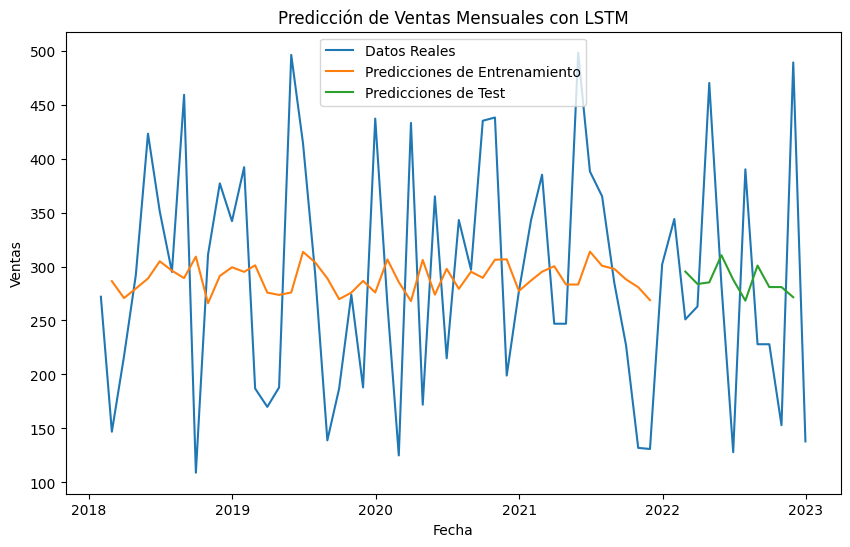

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Cargar datos de ejemplo
data = pd.read_csv('ventas_mensuales.csv', parse_dates=['fecha'], index_col='fecha')

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape data to [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Realizar predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización de los datos
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Datos Reales')
plt.plot(data.index[look_back:len(train_predict) + look_back], train_predict, label='Predicciones de Entrenamiento')
plt.plot(data.index[len(train_predict) + (look_back * 2) + 1:len(data) - 1], test_predict, label='Predicciones de Test')
plt.title('Predicción de Ventas Mensuales con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()
